In [1]:
import pandas as pd
import numpy as np

In [2]:
#1
df = pd.read_csv('data.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [44]:
#3.1.в каком формате написаны даты
df.InvoiceDate

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 541909, dtype: object

In [5]:
#3.1.функция приводящая к формату datetime
def to_date(x):
    date = pd.to_datetime(x, format='%m/%d/%Y %H:%M')
    return date

In [6]:
#3.1.применяем функцию к столбцу
df['InvoiceDate'] = df['InvoiceDate'].apply(to_date)

In [8]:
#3.1. проверяем результат
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539392 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539392 non-null  object        
 1   StockCode    539392 non-null  object        
 2   Description  539392 non-null  object        
 3   Quantity     539392 non-null  int64         
 4   InvoiceDate  539392 non-null  datetime64[ns]
 5   UnitPrice    539392 non-null  float64       
 6   CustomerID   406789 non-null  float64       
 7   Country      539392 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.0+ MB


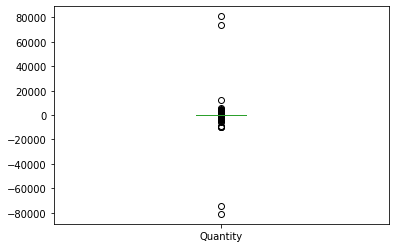

In [7]:
#3.2.1 визуально проверяем наличие выбросов данные о количестве
df['Quantity'].plot(kind='box')

In [8]:
#3.2.1 удаляем выбросы
df = df.loc[(df.Quantity > -1000) & (df.Quantity < 1000)]

In [21]:
#3.2.1 проверяем результат
df.describe()

,Quantity,UnitPrice,CustomerID
count,536577.000000,536577.000000,404889.000000
mean,9.592670,3.303513,15294.923377
std,28.262487,4.685381,1710.204661
min,-960.000000,0.001000,12347.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16794.000000
max,992.000000,649.500000,18287.000000


In [12]:
#3.2.2 удаляем строки со значениями цены меньше нуля
df = df.loc[(df.UnitPrice > 0)]

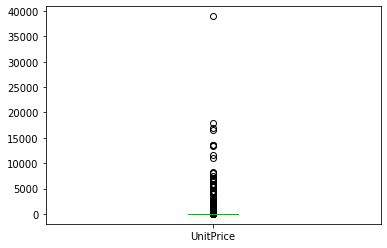

In [13]:
#3.2.2 визуально проверяем наличие выбросов данные о цене
df['UnitPrice'].plot(kind='box')

In [122]:
df.loc[(df.UnitPrice > 3000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
16357,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
96844,C544587,AMAZONFEE,AMAZON FEE,-1,2011-02-21 15:07:00,5575.28,NaN,United Kingdom
96845,C544589,AMAZONFEE,AMAZON FEE,-1,2011-02-21 15:11:00,5258.77,NaN,United Kingdom


In [22]:
#3.2.2 удаляем строки со списаниями, комиссиями и пр
df = df.loc[df.StockCode.isin(['AMAZONFEE', 'M', 'POST', 'DOT', 'B', 'D', 'CRUK', 'BANK CHARGES']) == False]

In [14]:
#3.3.проверим данные на наличие пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536577 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536577 non-null  object        
 1   StockCode    536577 non-null  object        
 2   Description  536577 non-null  object        
 3   Quantity     536577 non-null  int64         
 4   InvoiceDate  536577 non-null  datetime64[ns]
 5   UnitPrice    536577 non-null  float64       
 6   CustomerID   404889 non-null  float64       
 7   Country      536577 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [23]:
#4.1 добавляем категорию размера продаж
df.loc[(df.Quantity >= -10) & (df.Quantity <= 10), 'sale_size'] = 'retail'
df.loc[(df.Quantity < -10) | (df.Quantity > 10), 'sale_size'] = 'whole'

In [24]:
#4.1 добавляем категорию типа продаж
df.loc[(df.Quantity > 0), 'sale_type'] = 'sale'
df.loc[(df.Quantity < 0), 'sale_type'] = 'return'

In [25]:
#4.1 добавляем категорию типа пользователя
df.loc[df.CustomerID.isnull(), 'customer_type'] = 'notauth'
df.loc[df.CustomerID.notnull(), 'customer_type'] = 'auth'

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sale_size,sale_type,customer_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,retail,sale,auth
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,retail,sale,auth
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,retail,sale,auth
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,retail,sale,auth
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,retail,sale,auth


In [26]:
#4.2 добавляем сумму заказа
df['Sum'] = df['Quantity'] * df['UnitPrice']

In [27]:
#4.2 добавляем колонки с данными о времени заказа
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Date'] = pd.DatetimeIndex(df['InvoiceDate']).date

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
#5. данные по розничным продажам без возвратов и подарков
retail = df.loc[(df.sale_size == 'retail') & (df.sale_type == 'sale')]

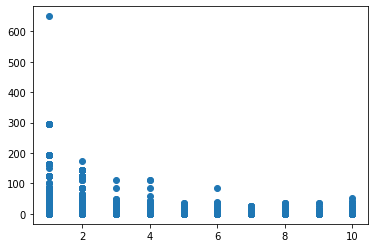

In [30]:
#5. точечный график цены и количества
plt.scatter(retail['Quantity'], retail['UnitPrice'])

In [47]:
#5. корреляция цены и количества
corr = retail[['Quantity','UnitPrice']].corr()
corr

,Quantity,UnitPrice
Quantity,1.000000,-0.170155
UnitPrice,-0.170155,1.000000


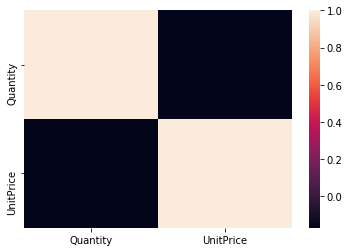

In [40]:
#5. тепловая карта матрицы корреляции
ax = sns.heatmap(corr)

In [385]:
#6.1 отфильтруем данные за период с 1.12.2010 по 30.11.2011
start = pd.to_datetime('2010-12-01', format='%Y-%m-%d')
end = pd.to_datetime('2011-11-30', format='%Y-%m-%d')

retail_1 = df.loc[(df['Date'] >= start) & (df['Date'] <= end)]

In [554]:
#6.2 
data = retail_1.groupby(['Month', 'Year']).sum()['Sum'].reset_index().sort_values('Year', ascending=True)

In [555]:
data

,Month,Year,Sum
11,12,2010,745571.080
0,1,2011,551524.290
1,2,2011,490372.740
2,3,2011,677141.080
3,4,2011,480577.701
4,5,2011,725796.540
5,6,2011,724845.530
6,7,2011,676172.971
7,8,2011,693730.120
8,9,2011,993845.881


In [556]:
#6.3. Разделим данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)

In [557]:
data_train

,Month,Year,Sum
10,11,2011,1414360.010
3,4,2011,480577.701
2,3,2011,677141.080
1,2,2011,490372.740
6,7,2011,676172.971
4,5,2011,725796.540
7,8,2011,693730.120
8,9,2011,993845.881
11,12,2010,745571.080


In [558]:
data_test

,Month,Year,Sum
5,6,2011,724845.53
0,1,2011,551524.29
9,10,2011,1049300.73


In [523]:
#6.4 Обучение модели
from sklearn.linear_model import LinearRegression

In [567]:
x_train, x_test = data_train[['Month']], data_test[['Month']]
y_train, y_test = data_train['Sum'], data_test['Sum']

In [568]:
reg = LinearRegression().fit(x_train, y_train)

In [569]:
print(reg.coef_)
print(reg.intercept_)

[55705.13874664]
388839.4066061008


In [359]:
#6.5 Результаты обучения
from sklearn.metrics import r2_score

In [571]:
r2_score(y_test, reg.predict(x_test))

0.826610433518665

In [573]:
#6.6 Построение прогноза на 3 месяца
#Переучим модель на всем объеме данных
reg1 = LinearRegression().fit(data[['Month']], data['Sum'])

In [581]:
#6.6 Создание датасет с прогнозом на 3 следующих месяца
x_pred = pd.DataFrame([12, 1, 2], columns = ['Month'])
year_pred = pd.DataFrame([2011, 2012, 2012], columns = ['Year'])
y_pred = pd.DataFrame(reg1.predict(x_pred), columns = ['Sum'])

In [582]:
#6.6 Создание датасет с прогнозом на 3 следующих месяца
data_pred = x_pred.join(year_pred).join(y_pred)
data_pred

,Month,Year,Sum
0,12,2011,1.066238e+06
1,1,2012,4.709689e+05
2,2,2012,5.250842e+05


In [578]:
#6.7 Соединение имеющихся данных с прогнозными
data_all = pd.concat([data, data_pred])

In [579]:
data_all['YM'] = data_all['Year'].astype(str) + '-' + data_all['Month'].astype(str)

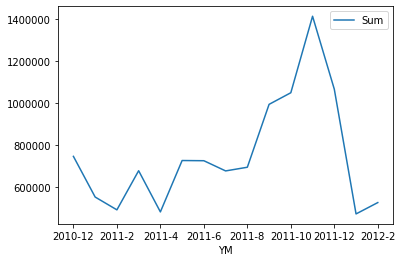

In [583]:
#6.7 График факта с прогнозом
data_all.plot(x='YM', y='Sum')

In [46]:
#7.1 Средний чек в зависимости от регистрации
df.loc[df.sale_type == 'sale'].groupby('customer_type').mean()['Sum']

customer_type
auth       21.089806
notauth    11.453818
Name: Sum, dtype: float64

In [70]:
#8 Сохранение датасета в файл
compression_opts = dict(method='zip',
                        archive_name='data_1.csv')  
df.to_csv('data_1.zip', sep='|', index=False,
          compression=compression_opts)